In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# <a id='toc1_'></a>[Data Cleaning Techniques with Pandas and NumPy](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Data Cleaning Techniques with Pandas and NumPy](#toc1_)    
  - [Basic Data Cleaning Operations](#toc1_1_)    
    - [Handling Missing Values](#toc1_1_1_)    
      - [Fill missing values](#toc1_1_1_1_)    
      - [Remove rows/columns with missing values](#toc1_1_1_2_)    
    - [Handle Duplicate data](#toc1_1_2_)    
    - [Replacing values](#toc1_1_3_)    
      - [Basic Replacement](#toc1_1_3_1_)    
      - [Replacing Multiple Values](#toc1_1_3_2_)    
      - [Replacing Values in a Specific Column](#toc1_1_3_3_)    
      - [Using Regular Expressions](#toc1_1_3_4_)    
    - [Detecting and Removing Outliers](#toc1_1_4_)    
  - [Examples](#toc1_2_)    
    - [Handling Duplicate Customer Profiles by Email](#toc1_2_1_)    
    - [ Handling Missing Values in Patient Records](#toc1_2_2_)    
      - [Identifying Missing Values](#toc1_2_2_1_)    
      - [Filling Missing Values with a Default Value](#toc1_2_2_2_)    
      - [Dropping Rows with Missing Values](#toc1_2_2_3_)    
    - [Handling Inconsistent Formats](#toc1_2_3_)    
    - [Handling Incorrect Values](#toc1_2_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Basic Data Cleaning Operations](#toc0_)

### <a id='toc1_1_1_'></a>[Handling Missing Values](#toc0_)

Pandas offers several methods to deal with missing data, such as removal and imputation.

Reference: [Working with missing data - User Guide]([https://](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data))

#### <a id='toc1_1_1_1_'></a>[Fill missing values](#toc0_)

[pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) is used to fill NaN with a value

[pandas.DataFrame.ffill](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ffill.html) is used to fill NaN values by propagating the last valid observation to next valid.

[pandas.DataFrame.bfill]([https://](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.bfill.html)) is uset to fill NaN values by using the next valid observation to fill the gap.

In [10]:
# Example dataset
data = {
    'A': [1, np.nan, 3, 4, 5],
    'B': [6, 7, 8, np.nan, 10],
    'C': [11, 12, np.nan, np.nan, 15]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1.0,6.0,11.0
1,NaN,7.0,12.0
2,3.0,8.0,NaN
3,4.0,NaN,NaN
4,5.0,10.0,15.0


In [4]:
# Replace all NaN elements with 0s.
df_fillna_zeros = df.fillna(value=0)
df_fillna_zeros

,A,B,C
0,1.0,6.0,11.0
1,0.0,7.0,12.0
2,3.0,8.0,0.0
3,4.0,0.0,0.0
4,5.0,10.0,15.0


In [6]:
# Replace all NaN in column A with 0; in column Б with its mean; in column C with its median
values = {
    'A': 0,
    'B': df['B'].mean(),
    'C': df['C'].median()
}
df_fillna_dict_values = df.fillna(value=values)
df_fillna_dict_values

,A,B,C
0,1.0,6.00,11.0
1,0.0,7.00,12.0
2,3.0,8.00,12.0
3,4.0,7.75,12.0
4,5.0,10.00,15.0


In [8]:
df

,A,B,C
0,1.0,6.0,11.0
1,NaN,7.0,12.0
2,3.0,8.0,NaN
3,4.0,NaN,NaN
4,5.0,10.0,15.0


In [9]:
# fill NaN values by propagating the last valid observation to next valid
df_fflil = df.ffill()
df_fflil

,A,B,C
0,1.0,6.0,11.0
1,1.0,7.0,12.0
2,3.0,8.0,12.0
3,4.0,8.0,12.0
4,5.0,10.0,15.0


In [18]:
df.B.ffill(inplace=True)
df

C:\Users\zehir\AppData\Local\Temp\ipykernel_21364\1826456583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.B.ffill(inplace=True)


,A,B,C
0,1.0,6.0,11.0
1,1.0,7.0,12.0
2,3.0,8.0,NaN
3,4.0,8.0,NaN
4,5.0,10.0,15.0


#### <a id='toc1_1_1_2_'></a>[Remove rows/columns with missing values](#toc0_)

[pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) is used to drop rows or columns with missing data

By using the `how{‘any’, ‘all’}, default ‘any’` parameter we can  determine if row or column is removed from DataFrame, when we have at least one NA or all NA.

In [19]:
# Example dataset
data = {
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [6, 7, 8, np.nan, 10],
    'C': [11, 12, np.nan, np.nan, 15]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1.0,6.0,11.0
1,NaN,7.0,12.0
2,3.0,8.0,NaN
3,NaN,NaN,NaN
4,5.0,10.0,15.0


In [20]:
# Dropping rows with all missing values
df.dropna(how='all', inplace=True)
df

,A,B,C
0,1.0,6.0,11.0
1,NaN,7.0,12.0
2,3.0,8.0,NaN
4,5.0,10.0,15.0


In [21]:
# Dropping columns with any missing values (how='any' is default)
df.dropna(axis=1, inplace=True)
df

,B
0,6.0
1,7.0
2,8.0
4,10.0


### <a id='toc1_1_2_'></a>[Handle Duplicate data](#toc0_)

Duplicate data can be easily identified and removed using Pandas's [duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) method

In [22]:
# Example dataset with duplicate rows
data = {
    'A': [1, 1, 2, 3, 4, 4],
    'B': ['a', 'a', 'b', 'c', 'd', 'd']
}
df = pd.DataFrame(data)
df

,A,B
0,1,a
1,1,a
2,2,b
3,3,c
4,4,d
5,4,d


In [23]:
# Identifying duplicate rows
duplicates = df.duplicated()
duplicates

0    False
1     True
2    False
3    False
4    False
5     True
dtype: bool

In [37]:
# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Dave', 'Alice', 'Bob'],
    'Age': [25, 30, 35, 40, 25, 30],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'New York', 'San Francisco']
}

# Creating DataFrame
df = pd.DataFrame(data)

In [35]:
# Removing duplicate rows
df.drop_duplicates()

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,Dave,40,Houston
5,Bob,30,San Francisco


### <a id='toc1_1_3_'></a>[Replacing values](#toc0_)

Replacing values is a common operation in data cleaning and preparation. Pandas provides a convenient method .replace() for this purpose.

#### <a id='toc1_1_3_1_'></a>[Basic Replacement](#toc0_)

If you want to replace all occurrences of a specific value in a DataFrame:

In [39]:
# Sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 9],
    'C': ['one', 'two', 'three', 'four', 'five']
})

# Replacing value 5 with 50 in the entire DataFrame
df.A.replace(1, 100)

0    100
1      2
2      3
3      4
4      5
Name: A, dtype: int64

#### <a id='toc1_1_3_2_'></a>[Replacing Multiple Values](#toc0_)

You can replace multiple values at once by passing a list of values and their replacements or by using a mapping dict.

In [13]:
# Using lists:
# df.replace([2,3],[20,30], inplace=True)

# Using mapping dict:
df.replace({2: 20, 3: 30}, inplace=True)
df

,A,B,C
0,1,50,one
1,20,6,two
2,30,7,three
3,4,8,four
4,50,9,five


#### <a id='toc1_1_3_3_'></a>[Replacing Values in a Specific Column](#toc0_)

If you want to replace values in a specific column, you can use the replace method on that column:

In [40]:
# Replacing values in column 'C'
df['C'] = df['C'].replace({'one': 'ONE', 'two': 'TWO'})
df

,A,B,C
0,1,5,ONE
1,2,6,TWO
2,3,7,three
3,4,8,four
4,5,9,five


#### <a id='toc1_1_3_4_'></a>[Using Regular Expressions](#toc0_)

The replace method can also work with regular expressions, which is very powerful for pattern-based replacement:

In [42]:
df.replace(to_replace=r'^f.*', value='STARTS WITH F', regex=True)

,A,B,C
0,1,5,ONE
1,2,6,TWO
2,3,7,three
3,4,8,STARTS WITH F
4,5,9,STARTS WITH F


Replacing empty strings and strings with only whitespaces with np.nan

In [43]:
# introduce empty strings and strings with spaces
df.loc[3,'C'] = ''
df.loc[4,'C'] = '     '
df

,A,B,C
0,1,5,ONE
1,2,6,TWO
2,3,7,three
3,4,8,
4,5,9,


In [44]:
df.replace(to_replace=r'^\s*$', value=np.nan, regex=True, inplace=True)
df

,A,B,C
0,1,5,ONE
1,2,6,TWO
2,3,7,three
3,4,8,NaN
4,5,9,NaN


### <a id='toc1_1_4_'></a>[Detecting and Removing Outliers](#toc0_)

Outlier detection can be done using various statistical methods, and one of the most common methods is the Interquartile Range (IQR) method, which is visually represented in a box plot ([Box_plot @wikipedia](https://en.wikipedia.org/wiki/Box_plot#Elements)).

Here's how the IQR method works:

1. Calculate the IQR: The IQR is the difference between the third quartile (Q3, the 75th percentile) and the first quartile (Q1, the 25th percentile). This range represents the middle 50% of the data.

2. Determine the Whiskers: The "whiskers" on a box plot extend to the highest and lowest values within 1.5 times the IQR from the Q1 and Q3. Mathematically, this is represented as:
        
        Lower whisker = Q1 − 1.5 * IQR
        Upper whisker = Q3 + 1.5 * IQR

3. Identify Outliers: Any data points that fall outside of the whiskers are considered outliers. In a box plot, these are often depicted as individual points beyond the whiskers.

<img src="./images/IQR.webp" style="height:200px; margin-left:50px">

Let's look at next example

In [45]:
# dataset of transaction amounts with less extreme outliers
data = {
    'transaction_amount': [
        # Main data cluster
        49, 51, 50, 50, 51, 52, 48, 49, 50, 51, 50, 49, 52, 48, 50, 51, 49, 50, 51, 52,
        48, 50, 49, 51, 52, 49, 50, 51, 48, 52, 50, 49, 51, 50, 52, 48, 50, 51, 49, 50,
        51, 52, 48, 50, 49, 51, 52, 49, 50, 51, 48, 52, 50, 49, 51, 50, 52, 48, 50, 51,
        # outliers
        40, 45, 60, 61, 62, 39
    ]
}

df = pd.DataFrame(data)

# show some stats on data:
df.describe()

,transaction_amount
count,66.000000
mean,50.212121
std,3.293421
min,39.000000
25%,49.000000
50%,50.000000
75%,51.000000
max,62.000000


C:\Users\zehir\Documents\GitHub\ML\venv\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


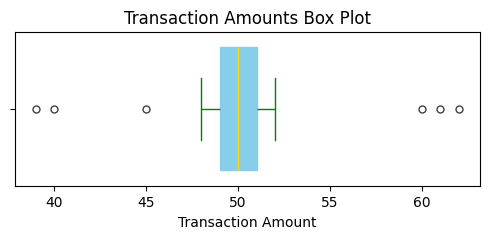

In [46]:
# Plot the data:
plt.figure(figsize=(6, 2))
sns.boxplot(x='transaction_amount', data=df,
            showfliers=True,
            flierprops=dict(marker='o', color='red', markersize=5),
            boxprops=dict(color="skyblue"),
            whiskerprops=dict(color="green"),
            capprops=dict(color="green"),
            medianprops=dict(color="gold"))

plt.title('Transaction Amounts Box Plot')
plt.xlabel('Transaction Amount')
plt.show()

- Central Box: (skyblue) represents the interquartile range (IQR), containing the middle 50% of the data between the first quartile (Q1) and third quartile (Q3).
- Median Line: (gold) shows the median of the data.
- Whiskers: (green) extend from the central box to show the full range of the data, typically to 1.5 * IQR beyond the quartiles (though this can be adjusted). They give a sense of the distribution's spread outside the middle 50%.
- Outliers: (black circles) reoresents data points that fall outside of the whiskers' range

In [48]:
# Outlier detection and removal using IQR
Q1 = df['transaction_amount'].quantile(0.25)
Q3 = df['transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['transaction_amount'] < lower_bound) | (df['transaction_amount'] > upper_bound)]
print('Outliers:')
print(outliers['transaction_amount'].tolist())

df_filtered = df[(df['transaction_amount'] >= lower_bound) & (df['transaction_amount'] <= upper_bound)]
print(f'Filtered data:')
print(df_filtered['transaction_amount'].tolist())
print(f"Number of outliers removed: {len(df) - len(df_filtered)}")

IQR: 2.0
Outliers:
[40, 45, 60, 61, 62, 39]
Filtered data:
[49, 51, 50, 50, 51, 52, 48, 49, 50, 51, 50, 49, 52, 48, 50, 51, 49, 50, 51, 52, 48, 50, 49, 51, 52, 49, 50, 51, 48, 52, 50, 49, 51, 50, 52, 48, 50, 51, 49, 50, 51, 52, 48, 50, 49, 51, 52, 49, 50, 51, 48, 52, 50, 49, 51, 50, 52, 48, 50, 51]
Number of outliers removed: 6


## <a id='toc1_2_'></a>[Examples](#toc0_)

### <a id='toc1_2_1_'></a>[Handling Duplicate Customer Profiles by Email](#toc0_)

In this example we will remove duplicate customer profiles based on their email, regardless of differences in their customer IDs or names. This method is especially useful in situations where the email address is a unique identifier for customer profiles.

In [21]:
# Sample DataFrame with customer profiles
data = {
    'CustomerID': [101, 102, 103, 104, 105],
    'Name': ['Ivan Petrov', 'Maria Ivanova', 'Georgi Dimitrov', 'Ivan Georgiev', 'Maria Ivanova'],
    'Email': ['ivan_petrov@example.com', 'maria_ivanova@example.com', 'georgi_dimitrov@example.com', 'ivan_georgiev@example.com', 'maria_ivanova@example.com']
}

df = pd.DataFrame(data)
df

,CustomerID,Name,Email
0,101,Ivan Petrov,ivan_petrov@example.com
1,102,Maria Ivanova,maria_ivanova@example.com
2,103,Georgi Dimitrov,georgi_dimitrov@example.com
3,104,Ivan Georgiev,ivan_georgiev@example.com
4,105,Maria Ivanova,maria_ivanova@example.com


In [22]:
# Identifying duplicate rows based on the 'Email' column
duplicates_by_email = df.duplicated(subset=['Email'])
duplicates_by_email

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [23]:
# Removing duplicate rows based on 'Email', keeping the first occurrence (default)
df_cleaned = df.drop_duplicates(subset=['Email'])
df_cleaned

,CustomerID,Name,Email
0,101,Ivan Petrov,ivan_petrov@example.com
1,102,Maria Ivanova,maria_ivanova@example.com
2,103,Georgi Dimitrov,georgi_dimitrov@example.com
3,104,Ivan Georgiev,ivan_georgiev@example.com


### <a id='toc1_2_2_'></a>[ Handling Missing Values in Patient Records](#toc0_)

In this example, we'll work with a dataset of patient records where some entries are missing the age or address. We'll see how to identify these missing entries and several strategies for handling them using Pandas.

In [49]:
# Sample DataFrame with patient records
data = {
    'PatientID': [1, 2, 3, 4, 5],
    'Name': ['Ivan Ivanov', 'Maria Popova', 'Georgi Georgiev', 'Sofia Petrova', 'Nikolai Nikolov'],
    'Age': [30, np.nan, 45, np.nan, 50],
    'Address': ['1000 Sofia', np.nan, '1500 Plovdiv', '1300 Varna', np.nan]
}

df = pd.DataFrame(data)
df

,PatientID,Name,Age,Address
0,1,Ivan Ivanov,30.0,1000 Sofia
1,2,Maria Popova,NaN,NaN
2,3,Georgi Georgiev,45.0,1500 Plovdiv
3,4,Sofia Petrova,NaN,1300 Varna
4,5,Nikolai Nikolov,50.0,NaN


#### <a id='toc1_2_2_1_'></a>[Identifying Missing Values](#toc0_)

In [50]:
# Identify rows with missing 'Age' or 'Address'
mask = df['Age'].isna() | df['Address'].isna()
missing_age_or_address = df[mask]
missing_age_or_address

,PatientID,Name,Age,Address
1,2,Maria Popova,NaN,NaN
3,4,Sofia Petrova,NaN,1300 Varna
4,5,Nikolai Nikolov,50.0,NaN


#### <a id='toc1_2_2_2_'></a>[Filling Missing Values with a Default Value](#toc0_)


In [51]:
# Filling missing 'Age' with the median age and 'Address' with a 'Address Unknown' placeholder
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Address'] = df['Address'].fillna('Address Unknown')
df

,PatientID,Name,Age,Address
0,1,Ivan Ivanov,30.0,1000 Sofia
1,2,Maria Popova,45.0,Address Unknown
2,3,Georgi Georgiev,45.0,1500 Plovdiv
3,4,Sofia Petrova,45.0,1300 Varna
4,5,Nikolai Nikolov,50.0,Address Unknown


#### <a id='toc1_2_2_3_'></a>[Dropping Rows with Missing Values](#toc0_)

If missing data cannot be accurately imputed or filled, it might be best to exclude those records from analysis:

In [52]:
# Dropping rows where either 'Age' or 'Address' is missing
df_dropped = df.dropna(subset=['Age', 'Address'])
df_dropped

,PatientID,Name,Age,Address
0,1,Ivan Ivanov,30.0,1000 Sofia
1,2,Maria Popova,45.0,Address Unknown
2,3,Georgi Georgiev,45.0,1500 Plovdiv
3,4,Sofia Petrova,45.0,1300 Varna
4,5,Nikolai Nikolov,50.0,Address Unknown


### <a id='toc1_2_3_'></a>[Handling Inconsistent Formats](#toc0_)

In this example, we'll address a common data cleaning issue where dates are inconsistently entered in a dataset, with some records using the DD/MM/YYYY format and others using the MM/DD/YYYY format.

To solve the problem we'll define `standardize_date` function that attempts to parse each date string using the DD/MM/YYYY format initially and, if it fails (indicating the date might be in the MM/DD/YYYY format due to a ValueError), it tries the MM/DD/YYYY format. After determining the correct format, it converts the date to a standardized YYYY-MM-DD format for consistency. The apply method is then used to apply this function to each date in the 'Date' column, creating a new 'Standardized Date' column with the corrected dates.

Keep in mind, this solution assumes that all dates are valid and does not account for ambiguous cases (e.g., 01/02/2023 could be January 2nd or February 1st). In real-world scenarios, additional context or data validation might be necessary to accurately distinguish between formats for such cases.

In [28]:
# Sample data with inconsistent date formats
data = {
    'Event': ['Concert', 'Conference', 'Meeting', 'Workshop', 'Seminar'],
    'Date': ['12/05/2024', '05/15/2024', '23/06/2024', '07/20/2024', '10/11/2024']
}

df = pd.DataFrame(data)
df

,Event,Date
0,Concert,12/05/2024
1,Conference,05/15/2024
2,Meeting,23/06/2024
3,Workshop,07/20/2024
4,Seminar,10/11/2024


In [29]:
from datetime import datetime

# Function to correct date formats
def correct_date_format(date_str):
    try:
        # Try parsing the date assuming DD/MM/YYYY format
        return datetime.strptime(date_str, "%d/%m/%Y").strftime("%Y-%m-%d")
    except ValueError:
        # If parsing fails, assume MM/DD/YYYY format
        return datetime.strptime(date_str, "%m/%d/%Y").strftime("%Y-%m-%d")

# Applying the function to correct date formats in the DataFrame
df['Corrected Date'] = df['Date'].apply(correct_date_format)
df

,Event,Date,Corrected Date
0,Concert,12/05/2024,2024-05-12
1,Conference,05/15/2024,2024-05-15
2,Meeting,23/06/2024,2024-06-23
3,Workshop,07/20/2024,2024-07-20
4,Seminar,10/11/2024,2024-11-10


### <a id='toc1_2_4_'></a>[Handling Incorrect Values](#toc0_)

Let's have incorrect values in a dataset that tracks employee information for a company. In this case, the 'Years of Experience' field contains some unrealistic values due to data entry errors, such as negative numbers or excessively high values for experience years.
We'll assume that a valid range for years of experience is between 0 and 50 years. We will replace any value outside this range with the meadian of valid values in 'Years of Experience'

In [53]:
import pandas as pd

# Sample data with incorrect values in the 'Years of Experience' field
data = {
    'Employee Name': ['Ivan Ivanov', 'Maria Popova', 'Georgi Georgiev', 'Sofia Petrova', 'Nikolai Nikolov'],
    'Position': ['Software Developer', 'Project Manager', 'Data Analyst', 'UX Designer', 'HR Specialist'],
    'Years of Experience': [5, -2, 25, 3, 150]
}

df = pd.DataFrame(data)
df

,Employee Name,Position,Years of Experience
0,Ivan Ivanov,Software Developer,5
1,Maria Popova,Project Manager,-2
2,Georgi Georgiev,Data Analyst,25
3,Sofia Petrova,UX Designer,3
4,Nikolai Nikolov,HR Specialist,150


In [54]:
# Calculate the meadian of valid values in 'Years of Experience':
valid_years_mask = (df['Years of Experience']>0) & (df['Years of Experience']<50)
valid_years = df['Years of Experience'].loc[valid_years_mask]
valid_years_median = np.median( valid_years ).astype(int)
valid_years_median

np.int64(5)

In [55]:
# Correcting incorrect 'Years of Experience' values
df['Corrected Years of Experience'] = (
    df['Years of Experience']
    .apply(lambda x: x if 0<x<50 else valid_years_median)
)
df

,Employee Name,Position,Years of Experience,Corrected Years of Experience
0,Ivan Ivanov,Software Developer,5,5
1,Maria Popova,Project Manager,-2,5
2,Georgi Georgiev,Data Analyst,25,25
3,Sofia Petrova,UX Designer,3,3
4,Nikolai Nikolov,HR Specialist,150,5


In [57]:
median_of_experiance = df['Years of Experience'].median()
median_of_experiance

df['my_col'] = df['Years of Experience'].apply(lambda x: x if x<20 else 1000)
df

,Employee Name,Position,Years of Experience,Corrected Years of Experience,my_col
0,Ivan Ivanov,Software Developer,5,5,5
1,Maria Popova,Project Manager,-2,5,-2
2,Georgi Georgiev,Data Analyst,25,25,1000
3,Sofia Petrova,UX Designer,3,3,3
4,Nikolai Nikolov,HR Specialist,150,5,1000
